# EDA On Test Data

This notebook repeats the same EDA as was done on the 3 month block of data, except using test data.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("/home/joe/datum/fare_amount_init_9_2023.parquet")

In [4]:
df.columns

Index(['pu_month', 'pu_year', 'pu_year_month', 'trip_distance',
       'trip_duration_min', 'fare_amount'],
      dtype='object')

In [5]:
# Let's add in the average travel rate
df["travel_rate"] = df["trip_distance"] / (df["trip_duration_min"] / 60)

In [6]:
target = "fare_amount"
numeric_feats = ["trip_distance", "trip_duration_min", "travel_rate"]

In [7]:
df = df[numeric_feats + [target]]

## Exploring the Target (Fare Amount)

count    2.402629e+06
mean     1.723059e+01
std      1.175443e+01
min      3.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.050000e+01
max      7.000000e+01
Name: fare_amount, dtype: float64
Lower Outlier Limit : -7.4999999999999964
Upper Outlier Limit : 37.3


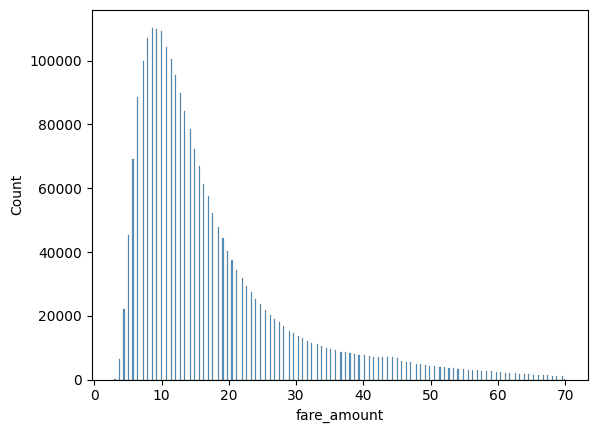

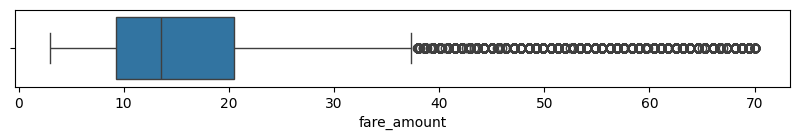

In [8]:
feat = target
summary = df[feat].describe()
print(summary)
iqr = summary.loc["75%"] - summary.loc["25%"]
upper_limit = summary.loc["75%"] + 1.5*iqr
lower_limit = summary.loc["25%"] - 1.5*iqr
print("Lower Outlier Limit :", lower_limit)
print("Upper Outlier Limit :", upper_limit)

sns.histplot(data=df, x=feat)
plt.show()
fig = plt.subplots(figsize=(10,1))
sns.boxplot(data=df, x=feat)
plt.show()

## Exploring Numeric Features

### Trip Distance

count    2.402629e+06
mean     2.676706e+00
std      2.776247e+00
min      1.000000e-02
25%      1.030000e+00
50%      1.700000e+00
75%      3.000000e+00
max      2.640000e+01
Name: trip_distance, dtype: float64 

Lower Outlier Limit : -1.925
Upper Outlier Limit : 5.955


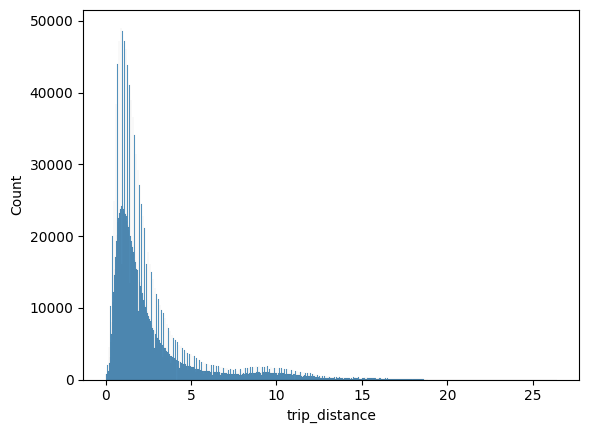

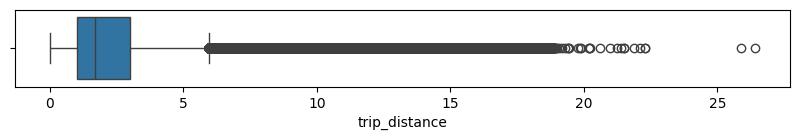

In [9]:
feat = "trip_distance"
summary = df[feat].describe()
print(summary, "\n")
iqr = summary.loc["75%"] - summary.loc["25%"]
upper_limit = summary.loc["75%"] + 1.5*iqr
lower_limit = summary.loc["25%"] - 1.5*iqr
print("Lower Outlier Limit :", lower_limit)
print("Upper Outlier Limit :", upper_limit)

sns.histplot(data=df, x=feat)
plt.show()
fig = plt.subplots(figsize=(10,1))
sns.boxplot(data=df, x=feat)
plt.show()

## Trip Duration (Minutes)

count    2.402629e+06
mean     1.565384e+01
std      1.084445e+01
min      1.016667e+00
25%      7.866667e+00
50%      1.283333e+01
75%      2.046667e+01
max      8.995000e+01
Name: trip_duration_min, dtype: float64 

Lower Outlier Limit : -11.033333333333331
Upper Outlier Limit : 39.36666666666666


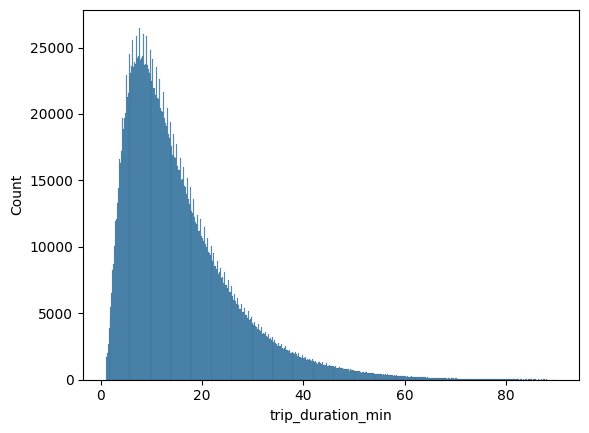

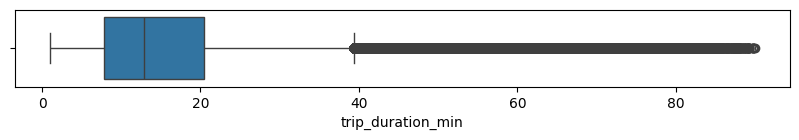

In [10]:
feat = "trip_duration_min"
summary = df[feat].describe()
print(summary, "\n")
iqr = summary.loc["75%"] - summary.loc["25%"]
upper_limit = summary.loc["75%"] + 1.5*iqr
lower_limit = summary.loc["25%"] - 1.5*iqr
print("Lower Outlier Limit :", lower_limit)
print("Upper Outlier Limit :", upper_limit)

sns.histplot(data=df, x=feat)
plt.show()
fig = plt.subplots(figsize=(10,1))
sns.boxplot(data=df, x=feat)
plt.show()

### Travel Rate

count    2.402629e+06
mean     1.005289e+01
std      5.692242e+00
min      1.335807e-02
25%      6.454183e+00
50%      8.837838e+00
75%      1.200428e+01
max      9.614634e+02
Name: travel_rate, dtype: float64 

Lower Outlier Limit : -1.8709681089992056
Upper Outlier Limit : 20.329435560151396


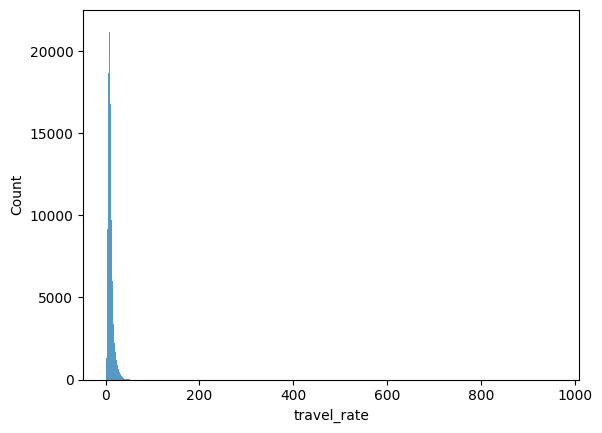

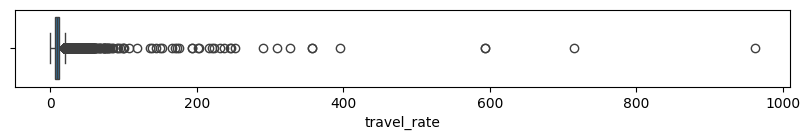

In [11]:
feat = "travel_rate"
summary = df[feat].describe()
print(summary, "\n")
iqr = summary.loc["75%"] - summary.loc["25%"]
upper_limit = summary.loc["75%"] + 1.5*iqr
lower_limit = summary.loc["25%"] - 1.5*iqr
print("Lower Outlier Limit :", lower_limit)
print("Upper Outlier Limit :", upper_limit)

sns.histplot(data=df, x=feat)
plt.show()
fig = plt.subplots(figsize=(10,1))
sns.boxplot(data=df, x=feat)
plt.show()

## Numeric Feature - Target Relationships

### Correlations

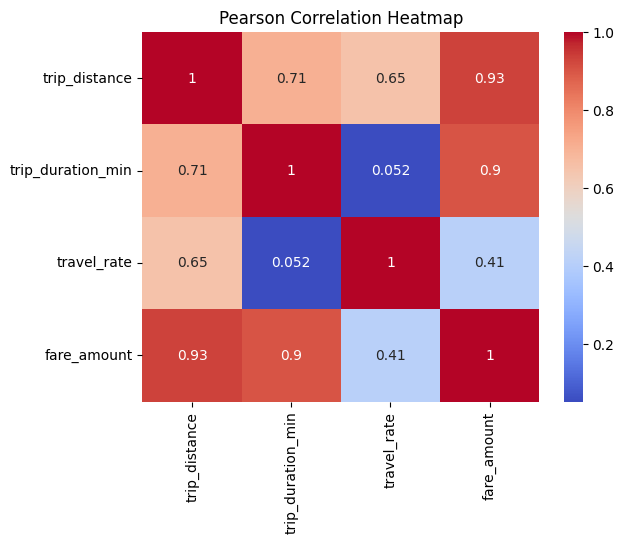

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

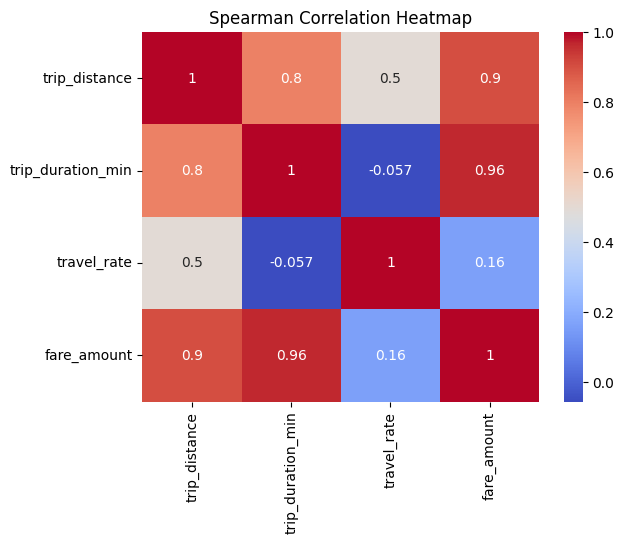

In [13]:
correlation_matrix = df.corr(method="spearman")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

### Trip Distance

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

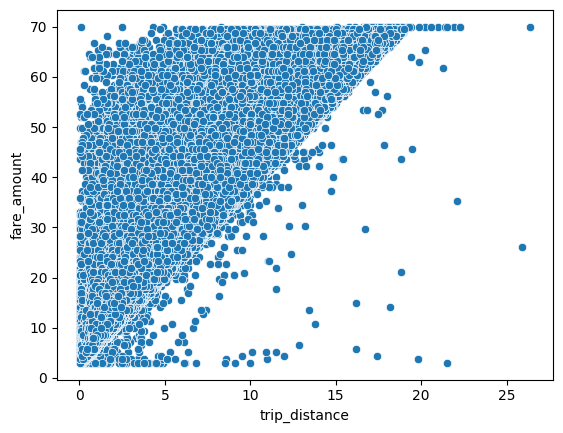

In [14]:
sns.scatterplot(data=df, x="trip_distance", y=target)

### Trip Duration

<Axes: xlabel='trip_duration_min', ylabel='fare_amount'>

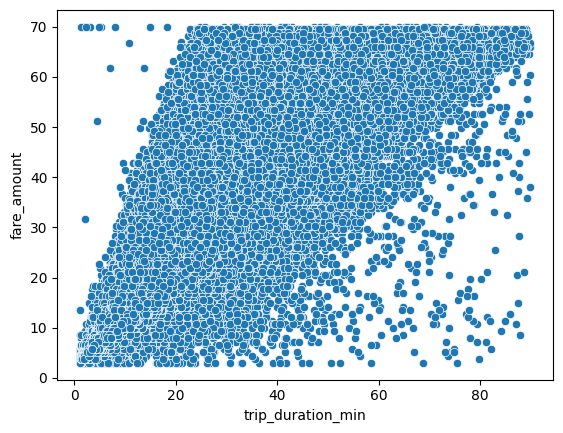

In [15]:
sns.scatterplot(data=df, x="trip_duration_min", y=target)

### Trip Distance + Trip Duration

In [16]:
df["dist_dur"] = df["trip_distance"] + df["trip_duration_min"]

<Axes: xlabel='dist_dur', ylabel='fare_amount'>

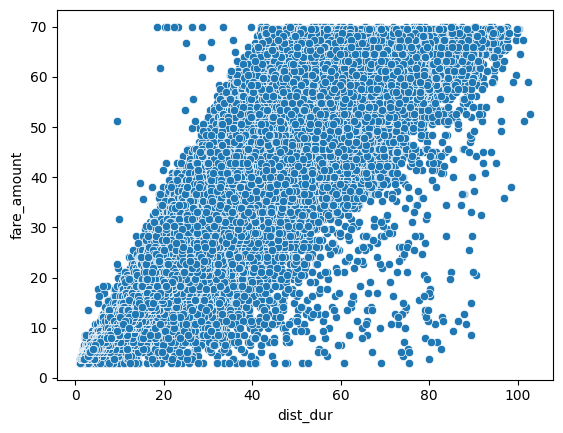

In [17]:
sns.scatterplot(data=df, x="dist_dur", y=target)

## Findings

The EDA on test data reveals similar findings as the initial EDA.
This is a good indicator that a model has a good chance of being able to predict test data points.